In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [13]:
print(tf.__version__)

2.17.0


In [14]:
df = pd.read_csv('1) FuelRatings.csv', encoding='utf-8', encoding_errors ='replace')
df.head()

,Model year,Make,Model,Vehicle class,Engine size (L),Cylinders,Transmission,Fuel type,City (L/100 km),Highway (L/100 km),Combined (L/100 km),Combined (mpg),CO2 emissions (g/km),CO2 rating,Smog rating
0,2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
1,2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2,2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
3,2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
4,2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


In [15]:
x_train = np.asanyarray(df[['Engine size (L)']])
y_train = np.asanyarray(df[['CO2 emissions (g/km)']])

In [16]:
a = tf.Variable(initial_value=0.0)
b = tf.Variable(initial_value=0.0)
def f(x):
   y = a*x + b
   return y

In [17]:
#Manually
def loss_object(y_train,y_pred) :
    return tf.reduce_sum(tf.square(tf.subtract(y_train,y_pred)))
#Pre-Defined
'''loss_object = tf.keras.losses.MeanSquaredLogarithmicError()'''

'loss_object = tf.keras.losses.MeanSquaredLogarithmicError()'

In [18]:
learning_rate = 0.000001
train_data = []
loss_values = []
a_values = []
b_values = []
iter = 765
for i in range(iter):
    with tf.GradientTape() as gt:
        gt.watch([a, b])
        y_pred = f(x_train)
        lv = loss_object(y_train, y_pred)
        loss_values.append(lv)
    da, db = gt.gradient(lv, [a, b])
    print(f"Gradient Values {i}: da = {da.numpy()}, db = {db.numpy()}")
    if da is not None and db is not None:
        b.assign_sub(da * learning_rate)
        a.assign_sub(db * learning_rate)
    if np.isnan(a.numpy()) or np.isnan(b.numpy()) or a.numpy() == np.inf or b.numpy() == np.inf or a.numpy() == -np.inf or b.numpy() == -np.inf:
        break
    a_values.append(a.numpy())
    b_values.append(b.numpy())
    print(f"Final Values {i}: a = {a.numpy()}, b = {b.numpy()}")

Gradient Values 0: da = -1316196.0, db = -395630.0
Final Values 0: a = 0.39563000202178955, b = 1.3161959648132324
Gradient Values 1: da = -1303312.875, db = -391758.125
Final Values 1: a = 0.7873880863189697, b = 2.619508743286133
Gradient Values 2: da = -1290556.0, db = -387924.1875
Final Values 2: a = 1.1753122806549072, b = 3.910064697265625
Gradient Values 3: da = -1277924.125, db = -384127.71875
Final Values 3: a = 1.559440016746521, b = 5.187988758087158
Gradient Values 4: da = -1265415.875, db = -380368.40625
Final Values 4: a = 1.9398083686828613, b = 6.453404426574707
Gradient Values 5: da = -1253029.875, db = -376645.90625
Final Values 5: a = 2.3164541721343994, b = 7.70643424987793
Gradient Values 6: da = -1240765.125, db = -372959.78125
Final Values 6: a = 2.6894140243530273, b = 8.947198867797852
Gradient Values 7: da = -1228620.5, db = -369309.8125
Final Values 7: a = 3.0587239265441895, b = 10.175819396972656
Gradient Values 8: da = -1216594.5, db = -365695.53125
Final 

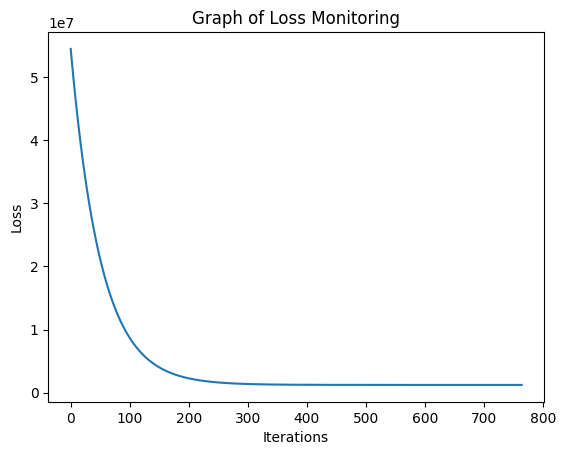

In [19]:
plt.plot(loss_values)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Graph of Loss Monitoring')
plt.show()